In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

In [30]:
normalize = lambda a: 1.0 * a / la.norm(a)

def point_on_plane(a, b):
    # return a point on plane a'x = b
    p = np.zeros_like(a)
    p[-1] = 1.0 * b / a[-1]
    return p
    
def project(q, a, b):
    # project q onto plane a'x = b
    p = point_on_plane(a, b)
    n = normalize(a)
    return q - n * np.dot(q - p, n)

def project_zero(a, b):
    # project origin onto plane a'x = b
    return 1.0 * a * b / a.dot(a)

def distance_to_plane(q, a, b):
    return la.norm(q - project(q, a, b))

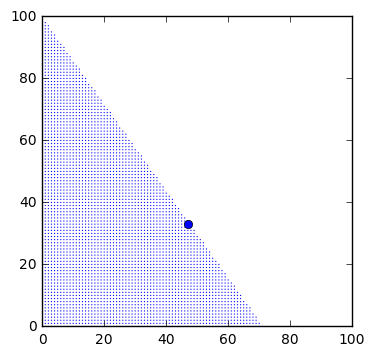

In [6]:
a = np.array([14, 10])
b = 1000
x0 = project_zero(a, b)

X = []

gridx = gridy = np.linspace(0, 100, 101)

for x1 in gridx: 
    for x2 in gridy: 
        x = [x1, x2]
        if a.dot(x) < b:
            X.append(x)

X = np.array(X)
plt.figure(figsize = (4, 4))
plt.xlim(gridx[0], gridx[-1])
plt.ylim(gridy[0], gridy[-1])
plt.scatter(X[:, 0], X[:, 1], s = 0.8, edgecolors = 'none')
plt.plot(x0[0], x0[1], 'o')
plt.show()

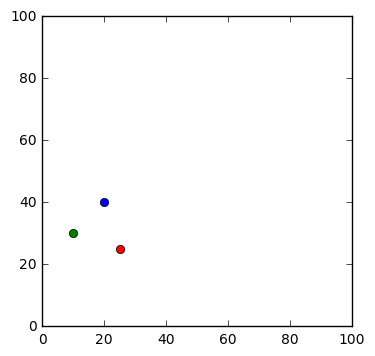

In [104]:
c = np.array([20, 40])
d = np.array([10, 30])
a = d - c
b = (d.dot(d) - c.dot(c)) / 2
x0 = b * a / a.dot(a)

gridx = gridy = np.linspace(0, 100, 101)

plt.figure(figsize = (4, 4))
plt.xlim(gridx[0], gridx[-1])
plt.ylim(gridy[0], gridy[-1])
offset = b * a / a.dot(a)
plt.plot(c[0], c[1], 'o')
plt.plot(d[0], d[1], 'o')
plt.plot(x0[0], x0[1], 'o')
plt.show()